# LFP power spectra

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from mimo_pack.preprocess.lfp import make_lfp_file_spikeglx, dclut_from_meta_lfp
import dclut as dcl

In [2]:
# binary data to load (replace with your own path)
bin_path = os.path.join("D:", "SortingTemp", "24-05-31_DH23_A1-IC_g0", 
                        "24-05-31_DH23_A1-IC_g0_imec0", 
                        "24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin")

# read meta file
lfp_path = make_lfp_file_spikeglx(bin_path)

100%|██████████| 451/451 [7:10:17<00:00, 57.25s/it]  


In [2]:
lfp_path = "D:\\SortingTemp\\24-05-31_DH23_A1-IC_g0\\24-05-31_DH23_A1-IC_g0_imec0\\24-05-31_DH23_A1-IC_g0_t0.imec0.lfp.bin"
lfp_dclpath = dclut_from_meta_lfp(lfp_path, lfp_fs=1000)

In [3]:
lfp_dcl = dcl.dclut(lfp_dclpath)
print(lfp_dcl)

File: 24-05-31_DH23_A1-IC_g0_t0.imec0.lfp.bin
Type: binary
Shape: [27013400, 385]
----------------

Data: data (au)
Type: int16
Scales:

  time (seconds)
  ----
  dimension: 0
  type: linear
  min: 0.0
  max: 27013.4

  channel (none)
  -------
  dimension: 1
  type: index
  values: [  0 384]

  ch_name (none)
  -------
  dimension: 1
  type: list
  values: ['AP0;0' 'AP1;1' 'AP2;2' 'AP3;3' 'AP4;4' 'AP5;5' 'AP6;6' 'AP7;7' 'AP8;8'
 'AP9;9' 'AP10;10' 'AP11;11' 'AP12;12' 'AP13;13' 'AP14;14' 'AP15;15'
 'AP16;16' 'AP17;17' 'AP18;18' 'AP19;19' 'AP20;20' 'AP21;21' 'AP22;22'
 'AP23;23' 'AP24;24' 'AP25;25' 'AP26;26' 'AP27;27' 'AP28;28' 'AP29;29'
 'AP30;30' 'AP31;31' 'AP32;32' 'AP33;33' 'AP34;34' 'AP35;35' 'AP36;36'
 'AP37;37' 'AP38;38' 'AP39;39' 'AP40;40' 'AP41;41' 'AP42;42' 'AP43;43'
 'AP44;44' 'AP45;45' 'AP46;46' 'AP47;47' 'AP48;48' 'AP49;49' 'AP50;50'
 'AP51;51' 'AP52;52' 'AP53;53' 'AP54;54' 'AP55;55' 'AP56;56' 'AP57;57'
 'AP58;58' 'AP59;59' 'AP60;60' 'AP61;61' 'AP62;62' 'AP63;63' 'AP64;64'
 

In [25]:
lfp_dcl.reset()
lfp_dcl.points({'channel': [100]})
lfp_dcl.intervals({'time': [0, 600]})
lfp_sig = lfp_dcl.read()

In [8]:
lfp_sig

[array([[191],
        [184],
        [201],
        ...,
        [-75],
        [-79],
        [-74]], dtype=int16)]

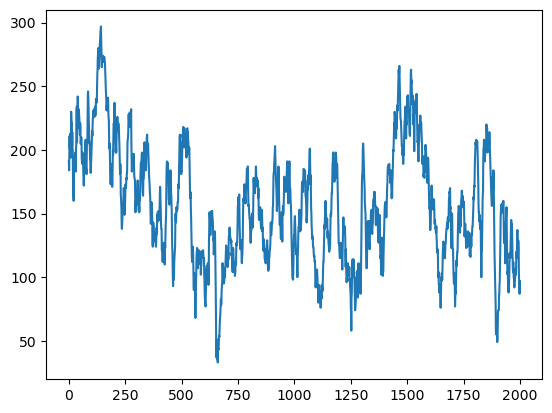

In [10]:
plt.plot(lfp_sig[0][:2000])

In [18]:
lfp_sig[0].shape

(100000, 1)

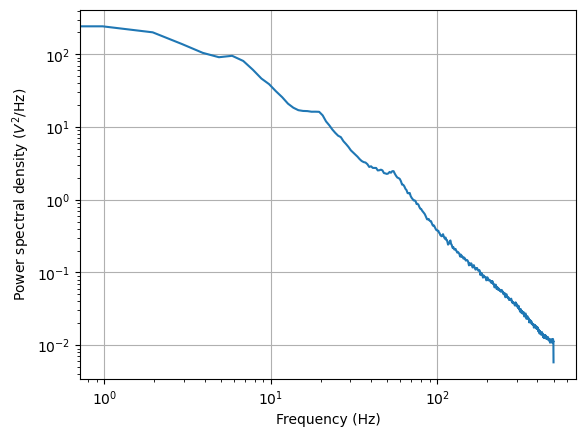

In [28]:
# compute power spectral density
f, Pxx = welch(lfp_sig[0].T, fs=1000, nperseg=1024, nfft=1024)

plt.figure()
plt.plot(f, Pxx.reshape(-1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density ($V^2$/Hz)')
plt.xscale('log')
plt.yscale('log')
plt.grid()